In [1]:
# Imports and path definitions

import sys
import os
import plotly.plotly as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from itertools import combinations

path = os.getcwd() + '/'

# NEW APPROACH

#### Pre analysis step!

-- hiperfino = 0 
-- Chequear el buen control sobre niveles

#### First trials:
~ Parallel and isotrope hyperfine
Polinomios de intervalos  5/3 puntos de H


# Flow
1. Run your simpre calculation and plot your results.
2. Run sensibility.py
3. Run Poly.py 
4. Run expected_values.py
5. Run main.py

n. of points: 804


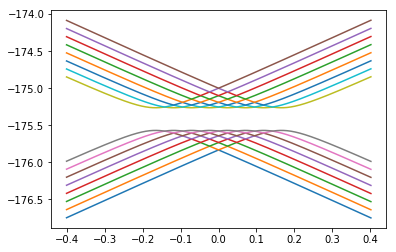

In [4]:
ene_f = path + "simpre.ene"

ene = np.loadtxt(ene_f, dtype= float)

plt.plot(ene[:,0], ene[:,[1,2,3,4,5,6,7,8, 9,10,11,12,13,14, 15,16]])
#plt.plot(ene[:,0], ene[:,[17, 18,19,20, 21, 22, 23, 24,25,26]])#, 9,10, 11, 12, 13, 14, 15, 16]])
#plt.plot(ene[:,0], ene[:,1:])
plt.savefig('plot_ene.png', dpi = 310)

print 'n. of points: ' + str(len(ene))
plt.show()


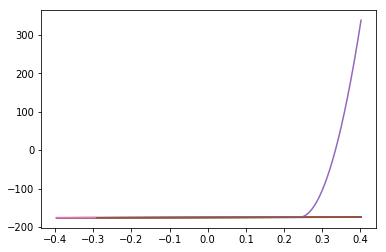

                lvl_1        lvl_2        lvl_3        lvl_4        lvl_5  \
-0.40101          NaN          NaN          NaN          NaN          NaN   
-0.40001          NaN          NaN          NaN          NaN          NaN   
-0.39901          NaN          NaN          NaN          NaN          NaN   
-0.39801          NaN          NaN          NaN          NaN          NaN   
-0.39701          NaN          NaN          NaN          NaN          NaN   
-0.39601  -176.624909  -176.515140  -176.405590  -176.296341  -176.187520   
-0.39501  -176.622595  -176.512830  -176.403285  -176.294043  -176.185234   
-0.39401  -176.620280  -176.510519  -176.400980  -176.291746  -176.182947   
-0.39301  -176.617966  -176.508209  -176.398675  -176.289449  -176.180661   
-0.39201  -176.615652  -176.505899  -176.396371  -176.287151  -176.178375   
-0.39101  -176.613338  -176.503589  -176.394066  -176.284854  -176.176089   
-0.39001  -176.611024  -176.501279  -176.391762  -176.282558  -176.173803   

In [16]:
# Evaluate expected values

#plt.plot(expected_df.index, expected_df.iloc[:,1:])
#plt.plot(expected_df.index, expected_df.iloc[:,[8,9,10,]])
plt.plot(expected_df.index, expected_df.iloc[:,[0,1,2,3,4,5,6,7,8, 9,10,11,12,13,14, 15]])
#plt.plot(expected_df.index, expected_df.iloc[:,[16,17,18,19,20,21,22, 23,24,25]])
#plt.savefig('expected_v.png', dpi = 310)

#print 'n. of points: ' + str(len(ene_prev))
plt.show()
#print expected_df
print expected_df

In [5]:
#
## Functions module
#

def poly(five_H, five_E):  
    # Adjusts a set of points (x,y) to its polynomia expression
    x = five_H # set campos H (5)
    y = five_E # set valores E (5)
        
    vec_z = np.polyfit(x, y, deg = 2)
    return vec_z
    


def expected_E(vec_z, H_v):
    # Calculates expected value for a given set of points adjusted w a polynomia
    k0 = vec_z[2]
    k1 = vec_z[1]
    k2 = vec_z[0]
    predicted_E = (k2 * (float(H_v)**2)) + (k1 * float(H_v)) + k0
    return predicted_E
    #expec_out.write(str(v) + '\t')


    
def truncate(f, n):
    #Truncates/pads a float f to n decimal places without rounding
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])



In [6]:
#
## Initial definitions
#

# Defined by the user so far; automatize for the future
J = float(8)
I = float(7.5)
g_par = 0.0000
g_per = 0.0000

# Lists
tot_lvls = int((2*J + 1)*(2*I + 1))
m_j = list(range(int(-(2*J)), int((2*J+2)), int(2)))
m_i = list(range(int(-(2*I)), int((2*I+2)), int(2)))

lvls_list = []
for i in list(range(np.size(ene, axis=1)-1)):
    lvls_list.append('lvl_'+ str(i+1))

## Generate projections list from m_j and m_i
projections_l = []
for j in m_j:
    for i in m_i:
        proj = str(j) + '/' + str(i)
        projections_l.append(proj)



In [8]:
#
##
### Loading datasets
##
#

# Loads new 'simpre.ene' file with energies of each level (quantum number) at diff H field
with open(path + 'simpre.ene', 'r') as ene_f:
    ene = np.loadtxt(ene_f, dtype= float)
    ene_df = pd.DataFrame(data=ene[0:,1:],  index=ene[0:,0] , columns=lvls_list)

if float(0.0) in ene_df.index:
    ene_df = ene_df.drop([0.0])
    


# Creating an empty DF for further lvl ordering
H_values = ene_df.index
expected_df = pd.DataFrame(index=H_values, columns=lvls_list)
final_df = pd.DataFrame(index=H_values, columns=lvls_list)
order_df = pd.DataFrame(index=H_values, columns=lvls_list)



# Fill first 5 positions of order_df
c = 0
for i in lvls_list:
    c=0
    for i2 in H_values:
        c+=1
        if c < 6 :
            order_df.loc[i2, i] = i.replace('lvl_' , '')



"""
# Define sensibility of the calc
AEs = []

for i in H_values:
    s_pool = pd.Series(ene_df.loc[i])
    pool = s_pool.tolist()
    
    v = 0
    for i in sum([map(list, combinations(pool, 2)) for i in range(len(pool) + 1)], []):
        if abs(i[0])-abs(i[1]) > v:
            v = abs(i[0])-abs(i[1])
print v
"""


'\n# Define sensibility of the calc\nAEs = []\n\nfor i in H_values:\n    s_pool = pd.Series(ene_df.loc[i])\n    pool = s_pool.tolist()\n    \n    v = 0\n    for i in sum([map(list, combinations(pool, 2)) for i in range(len(pool) + 1)], []):\n        if abs(i[0])-abs(i[1]) > v:\n            v = abs(i[0])-abs(i[1])\nprint v\n'

In [13]:
print ene_df.shape
print order_df.shape

(804, 26)
(804, 26)


In [20]:
#
##
### Loading datasets
##
#


# Loads new 'simpre.ene' file with energies of each level (quantum number) at diff H field
with open(path + 'simpre.ene', 'r') as ene_f:
    ene = np.loadtxt(ene_f, dtype= float)
    ene_df = pd.DataFrame(data=ene[0:,1:],  index=ene[0:,0] , columns=lvls_list)

if float(0.0) in ene_df.index:
    ene_df = ene_df.drop([0.0])
    


# Creating an empty DF for further lvl ordering
H_values = ene_df.index
expected_df = pd.DataFrame(index=H_values, columns=lvls_list)
final_df = pd.DataFrame(index=H_values, columns=lvls_list)
order_df = pd.DataFrame(index=H_values, columns=lvls_list)


# Fill first 5 positions of order_df
c = 0
for i in lvls_list:
    c=0
    for i2 in H_values:
        c+=1
        if c < 6 :
            order_df.loc[i2, i] = i.replace('lvl_' , '')


            
            
#
## Open out files
# 
expec_out = open('expected_values.out', 'w')
poli_out = open('poli.out', 'w')


#
##
### Main loop
##
#

#print order_df

c0 = 0
col = 0
row = 0

for i0 in lvls_list:

    c0+=1
    c1=0
    
    
    five_H = []
    five_E = []
    d_poli = {}
    
    
    poli_out.write(i0 + '\n' )
    
    
    for i1 in H_values:
        print 'aqui i1'
        print i1
        #c0 += 1
        c1 += 1     
        
        # Rellenar listas
        five_H.append(i1)
        
        pos = float(order_df.loc[i1, i0]) #position of the corresponding E_v in ene_df
        #col = int(pos)-1
        #row = int(c1)-1
        #five_E.append(ene_df.iloc[row, col])
        
        
        if math.isnan(pos):
            print 'isnull'
            five_E.append(v0)
            print five_E
        
        
        else:
            col = int(pos)-1
            row = int(c1)-1
            five_E.append(ene_df.iloc[row, col])
        
        
        
        #Control check point:
        print col
        print row
        print 'aqui los 5 campos' 
        print five_H
        print 'aqui las 5 Es' 
        print five_E
        
        
        # Everything starts now......
        if c1 == len(H_values):
            break
        
        
        elif len(five_H) ==5:
        
            # Fitting
            vec_poly = poly(five_H, five_E)
            p = np.poly1d(vec_poly)
            d_poli[i1] = p
            
            
            # Writes poli.out
            poli_out.write('H: ' + str(H_values[c1-1]) + ' ' + str(p) +'\n') #+ ' ' + five_H + ' ' + five_E + '\n')

            
            # Calculates expected_v for the next H value
            H_next = float(H_values[c1])
            
            v0 = float(expected_E(vec_poly, H_next))
            v1 = round(v0,6)
            v2 = round(v0,5)
            v3 = round(v0,4)
            #v4 = round(v0,3)
            v1 = truncate(v1, 6)
            v2 = truncate(v2, 5)
            v3 = truncate(v3, 4)
            #v4 = truncate(v4, 3)
            #v5 = truncate(v5, 2)

            expected_df.loc[H_next, i0] = v1


            # Search expected values in ene_df
            #e0 = ene_df.loc[H_next, i0]

            #if e0 == 'u':
                # Searchs for its value in the rest of columns
                for i3 in lvls_list:
                    c4 += 1

                    if ene_df.loc[H_next, i3] == 'u':
                        continue

                    else:

                        e0_2 = float(ene_df.loc[H_next, i3])
                        e1_2 = round(e0_2,6)
                        e2_2 = round(e0_2,5)
                        e3_2 = round(e0_2,4)
                        e4_2 = round(e0_2,3)
                        e1_2 = truncate(e1_2, 6)
                        e2_2 = truncate(e2_2, 5)
                        e3_2 = truncate(e3_2, 4)
                        e4_2 = truncate(e4_2, 3)



                        if v1 == e1_2:
                            order_df.loc[H_next, i0] = c4
                            ene_df.loc[i1 ,i3] = 'u'
                            print 'yes 1'


                        else:
                            if v2 == e2_2:
                                order_df.loc[H_next, i0] = c4
                                ene_df.loc[i1 ,i3] = 'u'
                                print 'yes 2'


                            #else:
                            #    if v3 == e3_2:
                            #        order_df.loc[H_next, i0] = c4
                            #        ene_df.loc[i1 ,i3] = 'u'
                            #        print 'yes 3'

            else:
                e0 = float(e0)
                e1 = round(e0,6)
                e2 = round(e0,5)
                e3 = round(e0,4)
                e4 = round(e0,3)
                e1 = truncate(e1, 6)
                e2 = truncate(e2, 5)
                e3 = truncate(e3, 4)
                e4 = truncate(e4, 3)

                """
                # Control check point
                print 'aqui v0: ' + str(v0)
                print 'aqui e0: ' + str(e0)
                print 'aqui v1: ' + str(v1)
                print 'aqui e1: ' + str(e1)
                print 'aqui v2: ' + str(v2)
                print 'aqui e2: ' + str(e2)
                print 'aqui v3: ' + str(v3)
                print 'aqui e3: ' + str(e3)
                print 'aqui v4: ' + str(v4)
                print 'aqui e4: ' + str(e4)
                """

                if v1 == e1:
                    order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                    ene_df.loc[i1, i0] = 'u'
                    print 'valor exacto'


                else:
                    if v2 == e2:
                        order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                        ene_df.loc[i1, i0] = 'u'
                        print 'valor exacto-2'

                    else:
                        if v3 == e3:
                            order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                            ene_df.loc[i1, i0] = 'u'
                            print 'valor exacto-3'

                        else:

                            print v1
                            print e1
                            print ene_df.loc[H_next]

                            c4 = 0

                            for i3 in lvls_list:
                                c4 += 1

                                if ene_df.loc[H_next, i3] == 'u':
                                    continue

                                else:

                                    e0_2 = float(ene_df.loc[H_next, i3])
                                    e1_2 = round(e0_2,6)
                                    e2_2 = round(e0_2,5)
                                    e3_2 = round(e0_2,4)
                                    e4_2 = round(e0_2,3)
                                    e1_2 = truncate(e1_2, 6)
                                    e2_2 = truncate(e2_2, 5)
                                    e3_2 = truncate(e3_2, 4)
                                    e4_2 = truncate(e4_2, 3)



                                    if v1 == e1_2:
                                        order_df.loc[H_next, i0] = c4
                                        ene_df.loc[i1 ,i3] = 'u'
                                        print 'yes 1'


                                    else:
                                        if v2 == e2_2:
                                            order_df.loc[H_next, i0] = c4
                                            ene_df.loc[i1 ,i3] = 'u'
                                            print 'yes 2'


                                        #else:
                                        #    if v3 == e3_2:
                                        #        order_df.loc[H_next, i0] = c4
                                        #        ene_df.loc[i1 ,i3] = 'u'
                                        #        print 'yes 3'



            c0 = c0-1
            five_E.pop(0)
            five_H.pop(0)
    
    poli_out.write('\n')
#print expected_df

order_df.to_csv(path + 'order.txt', header = lvls_list, sep=' ', na_rep='na')
expected_df.to_csv(path + 'expected.txt', header = lvls_list, sep=' ', na_rep='na')
    
## Condition 1 : compare pends (k1)
   
## Condition 2 : compare second derivative (k2)
    
## Condition 3 : allowed/non-allowed transitions (+/- 1) 
expec_out.close()
poli_out.close()

aqui i1
-0.40101
0
0
0
0
aqui los 5 campos
[-0.40101]
aqui las 5 Es
[-176.7487483]
aqui i1
-0.40001
0
1
0
1
aqui los 5 campos
[-0.40101, -0.40001]
aqui las 5 Es
[-176.7487483, -176.7464305]
aqui i1
-0.39901
0
2
0
2
aqui los 5 campos
[-0.40101, -0.40001, -0.39901]
aqui las 5 Es
[-176.7487483, -176.7464305, -176.7441128]
aqui i1
-0.39801
0
3
0
3
aqui los 5 campos
[-0.40101, -0.40001, -0.39901, -0.39801]
aqui las 5 Es
[-176.7487483, -176.7464305, -176.7441128, -176.7417951]
aqui i1
-0.39701
0
4
0
4
aqui los 5 campos
[-0.40101, -0.40001, -0.39901, -0.39801, -0.39701]
aqui las 5 Es
[-176.7487483, -176.7464305, -176.7441128, -176.7417951, -176.7394775]
valor exacto
aqui i1
-0.39601
0
5
0
5
aqui los 5 campos
[-0.40001, -0.39901, -0.39801, -0.39701, -0.39601]
aqui las 5 Es
[-176.7464305, -176.7441128, -176.7417951, -176.7394775, -176.7371599]
valor exacto
aqui i1
-0.39501
0
6
0
6
aqui los 5 campos
[-0.39901, -0.39801, -0.39701, -0.39601, -0.39501]
aqui las 5 Es
[-176.7441128, -176.7417951, -17

valor exacto
aqui i1
-0.34601
0
55
0
55
aqui los 5 campos
[-0.35001, -0.34901, -0.34801, -0.34701, -0.34601]
aqui las 5 Es
[-176.630617, -176.6283024, -176.6259879, -176.6236734, -176.621359]
valor exacto
aqui i1
-0.34501
0
56
0
56
aqui los 5 campos
[-0.34901, -0.34801, -0.34701, -0.34601, -0.34501]
aqui las 5 Es
[-176.6283024, -176.6259879, -176.6236734, -176.621359, -176.6190447]
valor exacto
aqui i1
-0.34401
0
57
0
57
aqui los 5 campos
[-0.34801, -0.34701, -0.34601, -0.34501, -0.34401]
aqui las 5 Es
[-176.6259879, -176.6236734, -176.621359, -176.6190447, -176.6167305]
valor exacto
aqui i1
-0.34301
0
58
0
58
aqui los 5 campos
[-0.34701, -0.34601, -0.34501, -0.34401, -0.34301]
aqui las 5 Es
[-176.6236734, -176.621359, -176.6190447, -176.6167305, -176.6144163]
valor exacto
aqui i1
-0.34201
0
59
0
59
aqui los 5 campos
[-0.34601, -0.34501, -0.34401, -0.34301, -0.34201]
aqui las 5 Es
[-176.621359, -176.6190447, -176.6167305, -176.6144163, -176.6121022]
valor exacto
aqui i1
-0.34101
0
60
0

valor exacto
aqui i1
-0.28301
0
118
0
118
aqui los 5 campos
[-0.28701, -0.28601, -0.28501, -0.28401, -0.28301]
aqui las 5 Es
[-176.4849553, -176.4826462, -176.4803372, -176.4780282, -176.4757194]
valor exacto
aqui i1
-0.28201
0
119
0
119
aqui los 5 campos
[-0.28601, -0.28501, -0.28401, -0.28301, -0.28201]
aqui las 5 Es
[-176.4826462, -176.4803372, -176.4780282, -176.4757194, -176.4734107]
valor exacto
aqui i1
-0.28101
0
120
0
120
aqui los 5 campos
[-0.28501, -0.28401, -0.28301, -0.28201, -0.28101]
aqui las 5 Es
[-176.4803372, -176.4780282, -176.4757194, -176.4734107, -176.4711021]
valor exacto
aqui i1
-0.28001
0
121
0
121
aqui los 5 campos
[-0.28401, -0.28301, -0.28201, -0.28101, -0.28001]
aqui las 5 Es
[-176.4780282, -176.4757194, -176.4734107, -176.4711021, -176.4687936]
valor exacto
aqui i1
-0.27901
0
122
0
122
aqui los 5 campos
[-0.28301, -0.28201, -0.28101, -0.28001, -0.27901]
aqui las 5 Es
[-176.4757194, -176.4734107, -176.4711021, -176.4687936, -176.4664852]
valor exacto
aqui i1

KeyboardInterrupt: 

In [ ]:
"""
                                    elif v5 == e7_2:
                                        order_df.loc[H_next, i0] = c4

                                    elif v5 == e8_2:
                                        order_df.loc[H_next, i0] = c4 

                                    elif v5 == e9_2:
                                        order_df.loc[H_next, i0] = c4

                                    elif v5 == e10_2:
                                        order_df.loc[H_next, i0] = c4 

                                    elif v5 == e11_2:
                                        order_df.loc[H_next, i0] = c4

                                    else:
                                        print 'estas jodida'
                                        print v5
                                        print e5_2
                                    #    print H_next
                                    #    print 
                                    #    print 'escribe nan'
                                    #    print 'ene' + str(e1)
                                    #    print 'expected' + str(v)
                                    #    print truncate(ene_df.loc[H_next, i3],3)
                                    #    print c4
                                    #    order_df.loc[H_next, i0] = 'nan'

                    
"""                    

In [48]:
#print order_df
print order_df#.loc[0.00399]
print expected_df.loc[0.00399]
print ene_df.loc[0.00399]


         lvl_1 lvl_2 lvl_3 lvl_4 lvl_5 lvl_6 lvl_7 lvl_8 lvl_9 lvl_10  ...    \
-0.50101     1     2     3     4     5     6     7     8     9     10  ...     
-0.49601     1     2     3     4     5     6     7     8     9     10  ...     
-0.49101     1     2     3     4     5     6     7     8     9     10  ...     
-0.48601     1     2     3     4     5     6     7     8     9     10  ...     
-0.48101     1     2     3     4     5     6     7     8     9     10  ...     
-0.47601     1     2     3     4     5     6     7     8     9     10  ...     
-0.47101     1     2     3     4     5     6     7     8     9     10  ...     
-0.46601     1     2     3     4     5     6     7     8     9     10  ...     
-0.46101     1     2     3     4     5     6     7     8     9     10  ...     
-0.45601     1     2     3     4     5     6     7     8     9     10  ...     
-0.45101     1     2     3     4     5     6     7     8     9     10  ...     
-0.44601     1     2     3     4     5  

In [127]:
#print ene_df
n = float(-176.7893967)
#print ene_df.iloc[7]

print ene_df.loc[-0.46601, 'lvl_2']
print ene_df.index



if n in ene_df.loc[-0.46601]:
    print 'yes'

-176.7893967
Float64Index([-0.50101, -0.49601, -0.49101, -0.48601, -0.48101, -0.47601,
              -0.47101, -0.46601, -0.46101, -0.45601,
              ...
               0.45899,  0.46399,  0.46899,  0.47399,  0.47899,  0.48399,
               0.48899,  0.49399,  0.49899,  0.50399],
             dtype='float64', length=202)


In [38]:
print expected_df.iloc[100,5:7]
print ene_df.iloc[100,5:7]
#print expected_df

lvl_6    -207.7121670
lvl_7    -207.7118580
Name: -0.001, dtype: object
lvl_6   -207.712167
lvl_7   -207.711858
Name: -0.001, dtype: float64


In [14]:
#print order_df

ene_df = np.array(ene_df)
order_df = np.array(order_df)

dims = ene_df.shape
print dims
tsize = dims[0]*dims[1]


#Recreate the ene_df array using the labels from order_df as a mask

df_final = np.arange(tsize).reshape(dims[0], dims[1])
df_final = np.array(df_final, dtype='float32')

for i in range(dims[0]):
    for j in range(dims[1]):
        label = int(order_df[i,j])
        i = int(i)
        j = int(j)
        if label == j+1:
            df_final[i,j] = ene_df[i,j]
        else:
            df_final[i,j] = ene_df[i,label-1] 
        

df_final = pd.DataFrame(df_final)
df_final.to_csv(path + 'final.txt', header = lvls_list, sep='\t', na_rep='na')

(206, 26)
             0           1           2           3           4           5   \
0   -207.806519 -207.805298 -207.804352 -207.800613 -207.798615 -207.791962   
1   -207.805832 -207.804611 -207.803665 -207.799896 -207.797897 -207.791183   
2   -207.805161 -207.803925 -207.802979 -207.799164 -207.797180 -207.790390   
3   -207.804489 -207.803253 -207.802307 -207.798447 -207.796478 -207.789597   
4   -207.803833 -207.802567 -207.801636 -207.797729 -207.795761 -207.788818   
5   -207.803162 -207.801895 -207.800949 -207.797028 -207.795059 -207.788025   
6   -207.802490 -207.801208 -207.800278 -207.796310 -207.794342 -207.787231   
7   -207.801834 -207.800537 -207.799606 -207.795593 -207.793640 -207.786453   
8   -207.801178 -207.799866 -207.798935 -207.794891 -207.792938 -207.785660   
9   -207.800522 -207.799194 -207.798279 -207.794174 -207.792236 -207.784866   
10  -207.799866 -207.798523 -207.797607 -207.793472 -207.791534 -207.784088   
11  -207.799210 -207.797867 -207.796951 -2

Eigen module

In [ ]:
#
##
### Functions
##
#
def pend(l_real, l_imag, l_projections, n):
    g = float(7)/6
    beta = 0.46686
    l_mj = []
    
    for i in l_projections:
        vec = i.split('/')
        l_mj.append(float(vec[0]))
    l = list(range(0,n))
    coef_l = []
    
    for i in l:
        x = complex(float(l_real[i]), float(l_imag[i]))    # complex
        coef_i = g*beta*(abs(x)**2)*l_mj[i]  # complex
        coef_l.append(coef_i)
    coef = sum(coef_l)
    
    return coef#, coef_l


def compare_pend(d_pends, d_eigenvectors): #d_eigenvalues
    d_dif = {}
    d_uniq = {}
    lim = 10**(-3)
    
        
    for a, b in combinations(d_pends, 2):
        #difE != 0
        # continue
        if d_eigenvectors[a] != d_eigenvectors[b]:
            value = abs(d_pends[a]- d_pends[b])

            if value < lim:
                d_dif[a + b] = value
    
    return d_dif


def sderivative(pend1, pend2, field1, field2):
    value = (float(pend1) - float(pend2)) / (float(campo1) - float(pend2))



In [98]:
#
##
### Slope calculation module from eigenvalues and eigenvectors
##
#

# Out files
out_f1 = open(path + 'global.out', 'w')
out_f3 = open(path + 'pends.out', 'w')
out_f3.write('H_value\t')

for i in list(range(1,tot_lvls+1)):
    out_f3.write('lvl_' + str(i) + '\t')
out_f3.write('\n')


#
## Parsing input file 'simpre.out'
#
with open(path + 'simpre.out', 'r') as f:
    lines = f.read().split('\n')




d_H = {}
H_values = []
d_eivec_pos = {}


c = 0
for i in lines:
    c+=1
    if 'Magnetic Field' in i:
        vec = i.split()
        H = vec[4]
        H_values.append(H)
        d_H[H] = c
        
    elif 'Eigenvectors' in i:
        d_eivec_pos[H] = c


c2 = 0
for i in H_values:
    c2 += 1
    out_f1.write('#################################################\n')
    out_f1.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f1.write('#################################################\n\n')
    out_f1.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f2 = open(path + 'temp_' + str(c2) + '.out', 'w')
    out_f2.write('#################################################\n')
    out_f2.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f2.write('#################################################\n\n')
    out_f2.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f3.write(str(i) + '\t')
    
    
    d_eigenvalues = {}
    d_eigenvectors = {}
    d_pend = {}
    l_pend = []
    
    eigenvalues_list = lines[(d_H[i] + 18) : (d_H[i] + 44) ] # 18 y 44 son valores fijos 
    
    for i2 in eigenvalues_list:
        vec = i2.split()
        d_eigenvalues['lvl_' + str(vec[3])] = vec[0]
        
    eigenvectors_list = lines[d_eivec_pos[i] : d_eivec_pos[i] + tot_lvls] # tot_lvls valor variable
    
    c3 = 0
    for i3 in eigenvectors_list:
        c3 += 1
        d_eigenvectors['lvl_' + str(c3)] = i3
        
    
    
    #
    ## Calculates slopes
    #
    for i4 in d_eigenvectors:
        vec = d_eigenvectors[i4].split()
        c_real =  vec[0::2]
        c_imag = vec[1::2]

        pend_i = pend(c_real, c_imag, projections_l,tot_lvls)
        d_pend[str(i4)] = pend_i
        l_pend.append(pend_i)
        

    ## Condition 1 : discriminates degeneracy and calculates difference between pends
    d_diffs = compare_pend(d_pend, d_eigenvalues)
    
    
    
    #### Writing temp_f and global .out
    for i in list(range(1,tot_lvls+1)):
        tag = 'lvl_' + str(i)
        out_f1.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        out_f2.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        
        out_f3.write(str(d_pend[tag]) + '\t')
    
    
    
    out_f1.write('\n\n\n')
    out_f1.write('## Differences map\n')
    out_f1.write('\n\n\n')
    
    out_f2.write('\n\n\n')
    out_f2.write('## Differences map\n')
    
    for i in d_diffs:
        out_f1.write(i + ' ' + str(d_diffs[i]) + '\n')
        out_f2.write(i + ' ' + str(d_diffs[i]) + '\n')
    
    out_f2.close()
    
    out_f3.write('\n')
    
    
    
    ## Break
    if c2 == 47:
        break



out_f1.close()
out_f3.close()

